In [33]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
import numpy as np
from sklearn.linear_model import LogisticRegression 
import datetime
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [91]:
#import data
titanic = pd.read_csv('/Users/gurpreetkaur/Downloads/titanic.csv')

In [74]:
#Exploratory Data Analysis 
titanic.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [7]:
titanic.tail()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.00
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.00
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.45
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.00
886,0,3,Mr. Patrick Dooley,male,32.0,0,0,7.75


In [8]:
#Checking the types of data
titanic.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [9]:
#total number of rows and columns
titanic.shape

(887, 8)

In [10]:
#checking for duplicate values

duplicate_rows_titanic = titanic[titanic.duplicated()]
print ('number of duplicate rows:', duplicate_rows_titanic.shape )

number of duplicate rows: (0, 8)


In [81]:
titanic.count()

Survived                   887
Pclass                     887
Name                       887
Sex                        887
Age                        887
Siblings/Spouses Aboard    887
Parents/Children Aboard    887
Fare                       887
dtype: int64

In [12]:
#missing value
titanic.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

<AxesSubplot:xlabel='Age'>

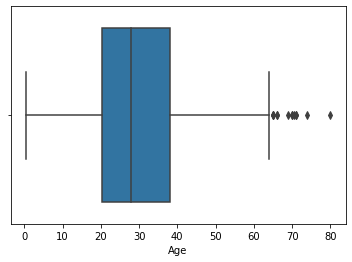

In [13]:
#viewing data by age
sns.boxplot(x=titanic['Age'])

In [14]:
#average age of people who survived / who not
titanic.groupby(['Survived']).agg({'Age' : ['mean']})

,Age
,mean
Survived,
0,30.138532
1,28.408392


In [15]:
#data information (short)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [16]:
titanic.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [17]:
#Creating some variables

survived = titanic[titanic['Survived'] == 1]
Not_survived = titanic[titanic['Survived'] == 0]

In [18]:
survived.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


<AxesSubplot:xlabel='Age'>

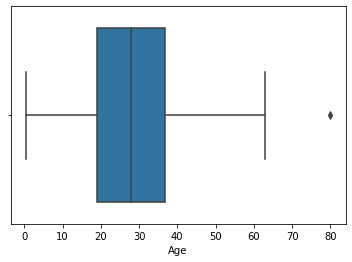

In [19]:
sns.boxplot(x=survived['Age'])

<AxesSubplot:xlabel='Age'>

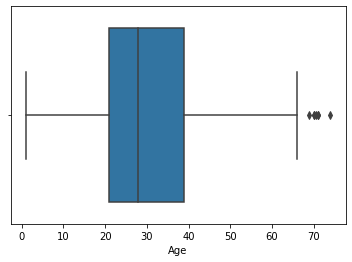

In [20]:
sns.boxplot(x=Not_survived['Age'])

In [21]:
#Finding relations between features and survival

#1. Pclass vs. Survival
titanic.Pclass.value_counts()

3    487
1    216
2    184
Name: Pclass, dtype: int64

In [22]:
pclass_survived = titanic.groupby(['Pclass']).Survived.value_counts()

In [23]:
pclass_survived

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           368
        1           119
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived'>

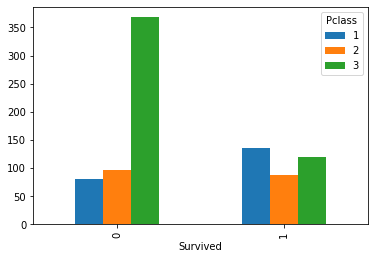

In [24]:
#ploting pclass vs survived
pclass_survived.unstack(level=0).plot(kind = 'bar', subplots = False)

In [25]:
#survival rate per class
pclass_survival_average = titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

In [26]:
pclass_survival_average

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.244353


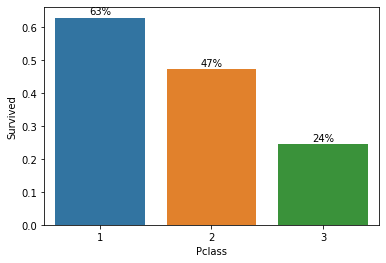

In [27]:
#Higher class passengers (low Pclass) have better average survival than the low class(high Pclass) passengers.

ax1=sns.barplot(x="Pclass", y="Survived", data=titanic, ci=None)

for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax1.annotate('{:.0%}'.format(height), (x, y + height + 0.01), (p.get_x()+.5*width, p.get_y() + height + 0.01), 
                ha='center')

plt.show()

In [28]:
#2) Sex vs. Survival (relationship)
titanic.Sex.value_counts()

male      573
female    314
Name: Sex, dtype: int64

In [30]:
sex_survival = titanic.groupby('Sex').Survived.value_counts()

In [31]:
sex_survival

Sex     Survived
female  1           233
        0            81
male    0           464
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived'>

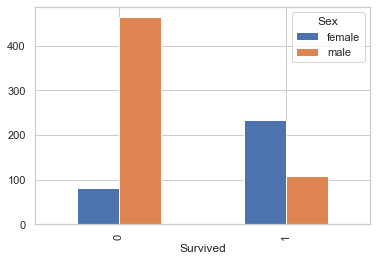

In [93]:
#ploting sex vs survived
sex_survival.unstack(level=0).plot(kind='bar', subplots=0)

In [96]:
#survival rate 
sex_survival_average = titanic [['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()
sex_survival_average

,Sex,Survived
0,female,0.742038
1,male,0.190227


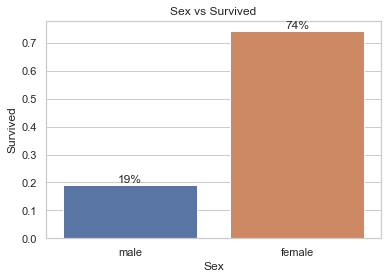

In [165]:
ax2 = sns.barplot(x='Sex', y='Survived', data=titanic, ci=None)
plt.title('Sex vs Survived')

for p in ax2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax2.annotate('{:.0%}'.format(height), (x, y + height + 0.01), (p.get_x()+.5*width, p.get_y() + height + 0.01), 
                ha='center')

plt.show()


In [101]:
#3) Pclass & Sex vs. Survival
#how many males and females are there in each Pclass 
Pclass_sex = pd.crosstab(titanic['Pclass'], titanic['Sex'])
print(Pclass_sex)

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   343


In [263]:
#ploting Pclass vs sex survival Percentage 
Pclass_sex_survival = titanic[['Pclass', 'Sex', 'Survived']].groupby(['Pclass', 'Sex'], 
                                as_index=True).mean().sort_values(by='Survived', ascending=False)

Pclass_sex_survival 

,,Survived
Pclass,Sex,
1,female,0.968085
2,female,0.921053
3,female,0.500000
1,male,0.368852
2,male,0.157407
3,male,0.137026


<AxesSubplot:xlabel='Sex'>

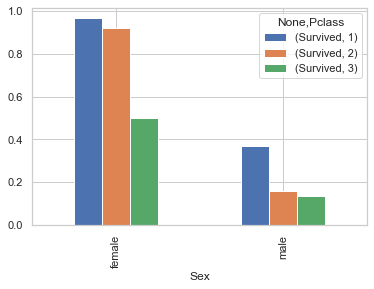

In [267]:
Pclass_sex_survival.unstack(level=0).plot(kind='bar')

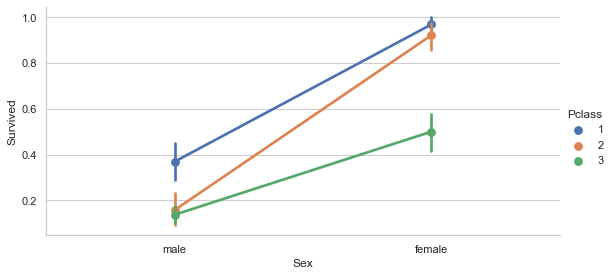

In [117]:
#survival rate of male and female in different class
sns.catplot(x='Sex', y='Survived', hue='Pclass', height=4, aspect=2, kind='point', data=titanic)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

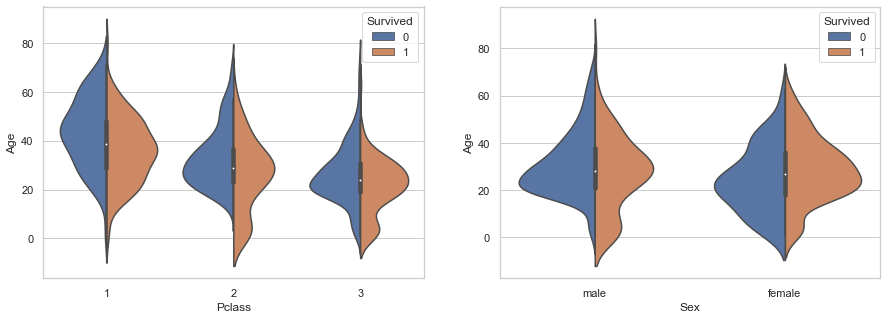

In [131]:
#Age vs. Survival
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.violinplot(x="Pclass", y="Age", hue="Survived", data=titanic, split=True, ax=ax1)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=titanic, split=True, ax=ax2)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

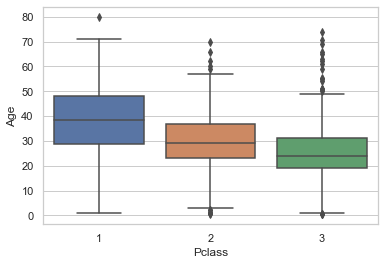

In [206]:
#Relationship between class and age
sns.boxplot(x='Pclass', y='Age', data=titanic)

In [211]:
survived_fare_age = titanic[['Survived', 'Fare', 'Age']]
survived_fare_age.head(5)

,Survived,Fare,Age
0,0,7.2500,22.0
1,1,71.2833,38.0
2,1,7.9250,26.0
3,1,53.1000,35.0
4,0,8.0500,35.0


In [198]:
F = titanic['Fare']
F.max()

512.3292

<AxesSubplot:xlabel='Fare'>

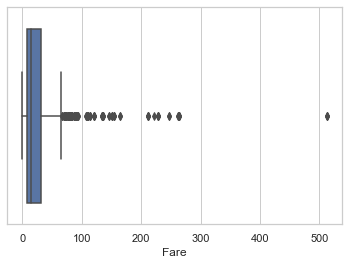

In [202]:
sns.boxplot(x=titanic['Fare'])

<AxesSubplot:xlabel='Age', ylabel='Fare'>

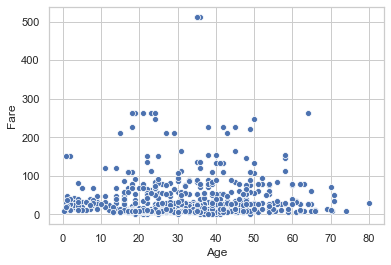

In [200]:
#Relationship between Fare and age
sns.scatterplot(x='Age', y='Fare', data=titanic)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

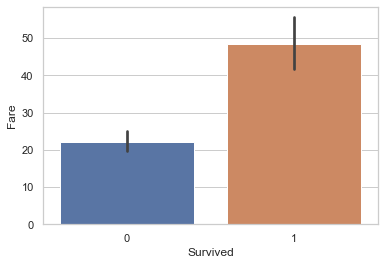

In [209]:
sns.barplot(x='Survived', y='Fare', data=titanic)

<AxesSubplot:>

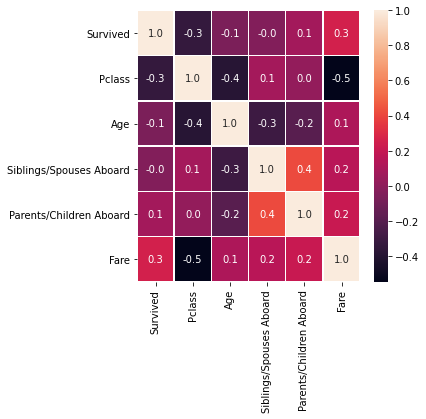

In [82]:
f,ax4 = plt.subplots(figsize=(5, 5))
sns.heatmap(titanic.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax4)

In [ ]:
#addtional method of converting variable 
#ib_sex = LabelEncoder()
#titanic['Sex1'] = ib_sex.fit_transform(titanic['Sex'])
#titanic[['Sex', 'Sex1']].head()

In [ ]:
#titanic['Sex1']=titanic['Sex'].cat.codes
#titanic.head()

In [ ]:
#titanic['Class'] = ib_sex.fit_transform(titanic['Pclass'])
#titanic[['Pclass', 'Class']].head(10)

In [92]:
#deleting variable
del titanic['Name']

In [93]:
#changing category
titanic['Sex'] = titanic['Sex'].astype('category')
titanic.dtypes

Survived                      int64
Pclass                        int64
Sex                        category
Age                         float64
Siblings/Spouses Aboard       int64
Parents/Children Aboard       int64
Fare                        float64
dtype: object

In [94]:
#Renaming columns 
titanic = titanic.rename(columns={'Siblings/Spouses Aboard': 'Siblings_Spouses_Aboard',
                        'Parents/Children Aboard': 'Parents_Children_Aboard'})

In [95]:
titanic.head()

,Survived,Pclass,Sex,Age,Siblings_Spouses_Aboard,Parents_Children_Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [96]:
titanic['Pclass'] = pd.Categorical(titanic.Pclass)
titanic['Sex'] = pd.Categorical(titanic.Sex)
titanic['Siblings_Spouses_Aboard'] = pd.Categorical(titanic['Siblings_Spouses_Aboard'])
titanic['Parents_Children_Aboard'] = pd.Categorical(titanic['Parents_Children_Aboard'])

In [97]:
titanic.dtypes

Survived                      int64
Pclass                     category
Sex                        category
Age                         float64
Siblings_Spouses_Aboard    category
Parents_Children_Aboard    category
Fare                        float64
dtype: object

In [178]:
#Using function to calculate WOE and IV
max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

In [181]:
np.seterr(divide = 'ignore') 

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [182]:
#Calculating IV
P_A = char_bin(titanic['Survived'], titanic['Parents_Children_Aboard'])
P_A

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,VAR,0,0,674,233,0.345697,441,0.654303,0.681287,0.809174,-0.172031,0.113
1,VAR,1,1,118,65,0.550847,53,0.449153,0.190058,0.097248,0.670070,0.113
2,VAR,2,2,80,40,0.500000,40,0.500000,0.116959,0.073394,0.465975,0.113
3,VAR,3,3,5,3,0.600000,2,0.400000,0.008772,0.003670,0.871440,0.113
4,VAR,4,4,4,0,0.000000,4,1.000000,0.000000,0.007339,0.000000,0.113
5,VAR,5,5,5,1,0.200000,4,0.800000,0.002924,0.007339,-0.920319,0.113
6,VAR,6,6,1,0,0.000000,1,1.000000,0.000000,0.001835,0.000000,0.113


In [14]:
P = char_bin(titanic['Survived'], titanic['Pclass'])
P

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,VAR,1,1,216,136,0.629630,80,0.370370,0.397661,0.146789,0.996603,0.494288
1,VAR,2,2,184,87,0.472826,97,0.527174,0.254386,0.177982,0.357172,0.494288
2,VAR,3,3,487,119,0.244353,368,0.755647,0.347953,0.675229,-0.662984,0.494288


In [15]:
S = char_bin(titanic['Survived'], titanic['Sex'])
S

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,VAR,female,female,314,233,0.742038,81,0.257962,0.681287,0.148624,1.522564,1.334387
1,VAR,male,male,573,109,0.190227,464,0.809773,0.318713,0.851376,-0.982562,1.334387


In [17]:
S_A = char_bin(titanic['Survived'], titanic['Siblings_Spouses_Aboard'])
S_A

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,VAR,0,0,604,210,0.347682,394,0.652318,0.614035,0.722936,-0.163268,0.1403
1,VAR,1,1,209,112,0.535885,97,0.464115,0.327485,0.177982,0.609763,0.1403
2,VAR,2,2,28,13,0.464286,15,0.535714,0.038012,0.027523,0.322874,0.1403
3,VAR,3,3,16,4,0.250000,12,0.750000,0.011696,0.022018,-0.632637,0.1403
4,VAR,4,4,18,3,0.166667,15,0.833333,0.008772,0.027523,-1.143463,0.1403
5,VAR,5,5,5,0,0.000000,5,1.000000,0.000000,0.009174,0.000000,0.1403
6,VAR,8,8,7,0,0.000000,7,1.000000,0.000000,0.012844,0.000000,0.1403


In [20]:
A = mono_bin(titanic['Survived'], titanic['Age'])
A

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,VAR,0.42,28.0,465,176,0.378495,289,0.621505,0.51462,0.530275,-0.029968,0.000982
1,VAR,28.50,80.0,422,166,0.393365,256,0.606635,0.48538,0.469725,0.032785,0.000982


In [21]:
F = mono_bin(titanic['Survived'], titanic['Fare'])
F

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,VAR,0.0000,7.9250,238,52,0.218487,186,0.781513,0.152047,0.341284,-0.808528,0.378032
1,VAR,8.0292,14.4542,206,60,0.291262,146,0.708738,0.175439,0.267890,-0.423287,0.378032
2,VAR,14.4583,31.0000,221,101,0.457014,120,0.542986,0.295322,0.220183,0.293604,0.378032
3,VAR,31.2750,512.3292,222,129,0.581081,93,0.418919,0.377193,0.170642,0.793188,0.378032


In [106]:
#converting Pclass into continous variable 
titanic = pd.get_dummies(titanic, columns=['Pclass'])

In [142]:
titanic['Sex']=titanic['Sex'].cat.codes
titanic.head()

,Survived,Sex,Age,Siblings_Spouses_Aboard,Parents_Children_Aboard,Fare,Pclass_1,Pclass_2,Pclass_3
0,0,1,22.0,1,0,7.2500,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0
2,1,0,26.0,0,0,7.9250,0,0,1
3,1,0,35.0,1,0,53.1000,1,0,0
4,0,1,35.0,0,0,8.0500,0,0,1


In [143]:
titanic.head()

,Survived,Sex,Age,Siblings_Spouses_Aboard,Parents_Children_Aboard,Fare,Pclass_1,Pclass_2,Pclass_3
0,0,1,22.0,1,0,7.2500,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0
2,1,0,26.0,0,0,7.9250,0,0,1
3,1,0,35.0,1,0,53.1000,1,0,0
4,0,1,35.0,0,0,8.0500,0,0,1


In [137]:
titanic.columns

Index(['Survived', 'Sex', 'Age', 'Siblings_Spouses_Aboard',
       'Parents_Children_Aboard', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [144]:
x = titanic.iloc[:,1:9]
x.head()

,Sex,Age,Siblings_Spouses_Aboard,Parents_Children_Aboard,Fare,Pclass_1,Pclass_2,Pclass_3
0,1,22.0,1,0,7.2500,0,0,1
1,0,38.0,1,0,71.2833,1,0,0
2,0,26.0,0,0,7.9250,0,0,1
3,0,35.0,1,0,53.1000,1,0,0
4,1,35.0,0,0,8.0500,0,0,1


In [119]:
y = titanic.iloc[:,0]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [145]:
x.shape

(887, 8)

In [146]:
y.shape

(887,)

In [147]:
#2.split those into train X , train Y, test X and Test Y
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=0)

In [148]:
X_train, X_test, y_train, y_test

(     Sex   Age Siblings_Spouses_Aboard Parents_Children_Aboard     Fare  \
 363    1  30.0                       0                       0   7.2500   
 255    0  38.0                       0                       0  79.2000   
 476    0   2.0                       0                       1  12.2875   
 271    1  37.0                       0                       1  29.7000   
 553    0  48.0                       1                       0  39.6000   
 ..   ...   ...                     ...                     ...      ...   
 835    1  29.0                       0                       0  29.7000   
 192    1   3.0                       1                       1  26.0000   
 629    1  32.0                       0                       0  30.5000   
 559    1  28.0                       0                       0  13.5000   
 684    1  19.0                       0                       0  10.1708   
 
      Pclass_1  Pclass_2  Pclass_3  
 363         0         0         1  
 255        

In [123]:
print(len(X_test))
print(len(X_train))
print(len(titanic))

178
709
887


In [170]:
model = LogisticRegression(max_iter=10000)
model_fit = model.fit(X_train, y_train)

In [171]:
model_fit

LogisticRegression(max_iter=10000)

In [172]:
pred = model_fit.predict(X_test)
pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1])

In [173]:
accuracy_score(y_test, pred)

0.7865168539325843

In [174]:
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
scores 

array([0.80985915, 0.87323944, 0.76760563, 0.73239437, 0.82269504])

In [175]:
scores.mean()

0.8011587254020578